In [61]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
pd.options.display.max_rows = 4000
pd.set_option('display.max_columns', 100)

In [14]:
!pip install scikit-surprise  #installed required package for Recommendation System

# Data Collection

In [2]:
mdf = pd.read_csv("movies.csv")  #reading in the csv file into a Pandas Data Frame
mdf.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [3]:
mdf.shape  #checked to see size of Data Frame

(9742, 3)

In [4]:
rdf = pd.read_csv("ratings.csv")  #reading in the csv file into a Pandas Data Frame
rdf.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [5]:
rdf.shape #checked to see size of Data Frame

(100836, 4)

In [8]:
ldf = pd.read_csv("links.csv", index_col = 0)  #reading in the csv file into a Pandas Data Frame
ldf.head(10)

,imdbId,tmdbId
movieId,,
1,114709,862.0
2,113497,8844.0
3,113228,15602.0
4,114885,31357.0
5,113041,11862.0
6,113277,949.0
7,114319,11860.0
8,112302,45325.0
9,114576,9091.0


In [9]:
ldf.shape  #checked to see size of Data Frame

(9742, 2)

In [10]:
tdf = pd.read_csv("tags.csv", index_col = 0)  #reading in the csv file into a Pandas Data Frame
tdf.head(10)

,movieId,tag,timestamp
userId,,,
2,60756,funny,1445714994
2,60756,Highly quotable,1445714996
2,60756,will ferrell,1445714992
2,89774,Boxing story,1445715207
2,89774,MMA,1445715200
2,89774,Tom Hardy,1445715205
2,106782,drugs,1445715054
2,106782,Leonardo DiCaprio,1445715051
2,106782,Martin Scorsese,1445715056


In [11]:
tdf.shape  #checked to see size of Data Frame

(3683, 3)

In [12]:
fdf = rdf.merge(mdf, on = 'movieId', how ='inner')
fdf.drop(columns=['title', 'genres', 'timestamp'], inplace = True)

In [13]:
fdf.head()

,userId,movieId,rating
0,1,1,4.0
1,5,1,4.0
2,7,1,4.5
3,15,1,2.5
4,17,1,4.5


# API CALL

In [31]:
imdb = ldf['imdbId'].values.astype(str)  #converted list type into string

In [32]:
def correct_imdb_ids(imdb):  
    imdb_ids = []
    for ids in imdb:
        if len(ids) == 3:
            imdb_ids.append('tt0000'+ids)
        elif len(ids) == 4:
            imdb_ids.append('tt000'+ids)
        elif len(ids) == 5:
            imdb_ids.append('tt00'+ids)
        elif len(ids) == 6:
            imdb_ids.append('tt0'+ids)
        elif len(ids) == 7:
            imdb_ids.append('tt'+ids)   
    return imdb_ids    #created function to correct the format of the IMDB ID's (need in order to do correct API pull)

In [41]:
imdb_ids = correct_imdb_ids(imdb)  #tested function to see if it worked properly
imdb_ids

['tt0114709',
 'tt0113497',
 'tt0113228',
 'tt0114885',
 'tt0113041',
 'tt0113277',
 'tt0114319',
 'tt0112302',
 'tt0114576',
 'tt0113189',
 'tt0112346',
 'tt0112896',
 'tt0112453',
 'tt0113987',
 'tt0112760',
 'tt0112641',
 'tt0114388',
 'tt0113101',
 'tt0112281',
 'tt0113845',
 'tt0113161',
 'tt0112722',
 'tt0112401',
 'tt0114168',
 'tt0113627',
 'tt0114057',
 'tt0114011',
 'tt0114117',
 'tt0112682',
 'tt0115012',
 'tt0112792',
 'tt0114746',
 'tt0112431',
 'tt0112818',
 'tt0113442',
 'tt0112697',
 'tt0112749',
 'tt0114279',
 'tt0112819',
 'tt0114272',
 'tt0113855',
 'tt0114681',
 'tt0113347',
 'tt0114369',
 'tt0114148',
 'tt0114916',
 'tt0114814',
 'tt0113819',
 'tt0110299',
 'tt0112499',
 'tt0113158',
 'tt0113321',
 'tt0110877',
 'tt0113419',
 'tt0116260',
 'tt0113862',
 'tt0116126',
 'tt0118002',
 'tt0115683',
 'tt0116839',
 'tt0113149',
 'tt0113118',
 'tt0116367',
 'tt0113010',
 'tt0113537',
 'tt0113828',
 'tt0115644',
 'tt0115676',
 'tt0114367',
 'tt0113973',
 'tt0112744',
 'tt01

In [40]:
len(imdb_ids)  #checked to see length 

9742

In [35]:
import requests # For API requests
import json # For API requests
import time # To delay API & web scrapping pulls to avoid crashes
from tqdm import tqdm #to see progres of loop

In [36]:
api_key = '49fc59a029e4df5ad29e6be556dae829'  #set API key

In [48]:
# For loop to iterate through all of the imdb_ids into the TMDB API pull.
# Added a sleep timer of .200 to prevent the website from blocking our request
# This pull took over 15min to run due to the amount of repititions the for loop does
# tqdm is used to track the progress of the function
imdb_data = []
for ids in tqdm(imdb_ids):
    request = requests.get('https://api.themoviedb.org/3/movie/' + ids + '?api_key=' + api_key + '&language=en-US')
    time.sleep(.200)
    i = request.json()
    imdb_data.append(i)
print(imdb_data)

100%|██████████| 9742/9742 [54:30<00:00,  2.98it/s]  IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




In [49]:
# All the different keys of information that the API pull brought
request.json().keys()

dict_keys(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count'])

In [93]:
# From the for loop iteration above we took the new imdb_data list and transformed it into a Data Frame
tmdb = pd.DataFrame.from_dict(imdb_data)
tmdb.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,status_code,status_message
0,False,/lxD5ak7BOoinRNehOCA85CQ8ubr.jpg,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",34.421,/uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg,"[{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,,Toy Story,False,7.9,12705.0,NaN,NaN
1,False,/y7SQmjlB42VvYyRIFQXLQ4ZYrn.jpg,"{'id': 495527, 'name': 'Jumanji Collection', '...",65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.sonypictures.com/movies/jumanji/,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,6.774,/vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg,"[{'id': 559, 'logo_path': '/eC0bWHVjnjUducyA6Y...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,7.2,7425.0,NaN,NaN
2,False,/vAZZrfi0xwE226zpSTAbJ7gUWwf.jpg,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",,15602.0,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,10.714,/1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg,"[{'id': 19464, 'logo_path': None, 'name': 'Lan...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.6,205.0,NaN,NaN
3,False,/yibpm3qFap62p92GL2mP71cevS9.jpg,None,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",,31357.0,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",8.902,/4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg,"[{'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVR...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.2,76.0,NaN,NaN
4,False,/wKQlgHjJwh5mGBZ37vDsXBx9zbh.jpg,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",,11862.0,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,11.751,/lf9RTErt8BSLQy98aSFblElvsCQ.jpg,"[{'id': 9195, 'logo_path': '/ou5BUbtulr6tIt699...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-08,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,6.2,419.0,NaN,NaN


In [94]:
import csv  #imported to have CSV file in a folder 
tmdb.to_csv('tmdb.csv')

In [95]:
tmdb = pd.read_csv("tmdb.csv")  #reading in the csv file into a Pandas Data Frame

In [96]:
ldf['imdb_id'] = imdb_ids  #added correct ID's into ldf DataFrame

In [97]:
hdf = rdf.merge(mdf, on = 'movieId', how ='inner')  #merging the movie and rating Data Frames
hdf.drop(columns=['timestamp','genres'], inplace = True)

In [98]:
gdf = hdf.merge(ldf, on = 'movieId', how ='inner')  #merging the IMDB lists with merged rating & movie Data Frame
gdf.drop(columns=['tmdbId','imdbId'], inplace = True)
gdf.head()

,userId,movieId,rating,title,imdb_id
0,1,1,4.0,Toy Story (1995),tt0114709
1,5,1,4.0,Toy Story (1995),tt0114709
2,7,1,4.5,Toy Story (1995),tt0114709
3,15,1,2.5,Toy Story (1995),tt0114709
4,17,1,4.5,Toy Story (1995),tt0114709


In [99]:
tmdb = gdf.merge(tmdb, on = 'imdb_id', how ='inner')  #merged API data with rating data on IMDB ID
tmdb.drop(columns=['Unnamed: 0','homepage','tagline','backdrop_path','belongs_to_collection', 'original_language','vote_count','status_message',
               'poster_path','adult','id','original_title', 'production_companies', 'production_countries','status_code',
               'overview','spoken_languages','status','title_y','video','vote_average'], inplace = True)
#dropped unecessary columns 

In [100]:
tmdb.head()

,userId,movieId,rating,title_x,imdb_id,budget,genres,popularity,release_date,revenue,runtime
0,1,1,4.0,Toy Story (1995),tt0114709,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",34.421,1995-10-30,373554033.0,81.0
1,5,1,4.0,Toy Story (1995),tt0114709,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",34.421,1995-10-30,373554033.0,81.0
2,7,1,4.5,Toy Story (1995),tt0114709,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",34.421,1995-10-30,373554033.0,81.0
3,15,1,2.5,Toy Story (1995),tt0114709,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",34.421,1995-10-30,373554033.0,81.0
4,17,1,4.5,Toy Story (1995),tt0114709,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",34.421,1995-10-30,373554033.0,81.0


In [101]:
tmdb.dtypes  #checked to see object types of new Dataset

userId            int64
movieId           int64
rating          float64
title_x          object
imdb_id          object
budget          float64
genres           object
popularity      float64
release_date     object
revenue         float64
runtime         float64
dtype: object

In [102]:
tmdb.drop([68129,77353,85889,86892,88413,94953,96648,96868,99011,  #dropped rows with no genres
          99309,99530,99876,99934,100124,100194], inplace = True)

In [103]:
# Separate list of genres for each movie into one main genre to categorize by utilizing split and replace
tmdb['main_genre'] = tmdb['genres'].map(lambda x: x.split(':')[2]).replace('}, ','')
tmdb['main_genre'] = tmdb['main_genre'].map(lambda x: x.split('{')[0].strip())
tmdb['main_genre'] = tmdb['main_genre'].map(lambda x: x.replace('},',''))
tmdb['main_genre'] = tmdb['main_genre'].map(lambda x: x.replace('}]',''))
tmdb['main_genre'] = tmdb['main_genre'].map(lambda x: x.replace("'",''))

In [104]:
tmdb['runtime2'] = pd.cut(tmdb.runtime, bins=[0,60,120,180,900], labels= ['0-59', '60-119', '120-179', '180+'])
#creating a new column to put runtimes into buckets of time ranges

In [105]:
tmdb['release_date'] = tmdb['release_date'].map(lambda x: int(x.split('-')[0]))
# edit the release date to show only the year

In [106]:
tmdb.head()

,userId,movieId,rating,title_x,imdb_id,budget,genres,popularity,release_date,revenue,runtime,main_genre,runtime2
0,1,1,4.0,Toy Story (1995),tt0114709,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",34.421,1995,373554033.0,81.0,Animation,60-119
1,5,1,4.0,Toy Story (1995),tt0114709,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",34.421,1995,373554033.0,81.0,Animation,60-119
2,7,1,4.5,Toy Story (1995),tt0114709,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",34.421,1995,373554033.0,81.0,Animation,60-119
3,15,1,2.5,Toy Story (1995),tt0114709,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",34.421,1995,373554033.0,81.0,Animation,60-119
4,17,1,4.5,Toy Story (1995),tt0114709,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",34.421,1995,373554033.0,81.0,Animation,60-119


# EDA

In [22]:
edf = rdf.merge(mdf, on = 'movieId', how ='inner')  #merged datasets in order for EDA
edf.drop(columns=['timestamp'], inplace = True)
edf.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [23]:
edf[edf["title"] == "Toy Story (1995)"] #wanted to check count of Toy Story Movie 

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...
210,606,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
211,607,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
212,608,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
213,609,1,3.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [24]:
edf.isnull().sum()  #checked to see if any null values

userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64

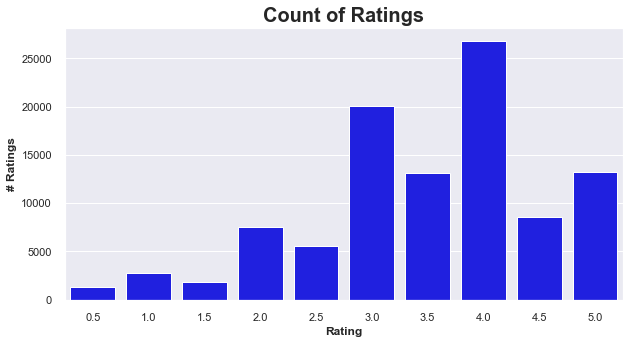

In [131]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(edf['rating'], palette = ['BLUE'])
plt.title('Count of Ratings', fontsize = 20,fontweight='bold')
plt.ylabel('# Ratings', fontsize = 12,fontweight='bold')
plt.xlabel('Rating', fontsize = 12,fontweight='bold')
# plt.savefig('Count_of_Ratings.png')

# Hypothesis Testing

In [47]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy import stats

### One Way ANOVA Test (Movie Budget & Movie Rating)

Is there a relationship between the budget of a movie and the rating it receives?

H0: No statistical difference between budget and movie rating

HA: There is a statisitcal difference between budget and movie rating

In [59]:
stats.f_oneway(tmdb['budget'][tmdb['rating'] == 0.5],
               tmdb['budget'][tmdb['rating'] == 1.0],
               tmdb['budget'][tmdb['rating'] == 1.5],
               tmdb['budget'][tmdb['rating'] == 2.0],
               tmdb['budget'][tmdb['rating'] == 2.5],
               tmdb['budget'][tmdb['rating'] == 3.0],
               tmdb['budget'][tmdb['rating'] == 3.5],
               tmdb['budget'][tmdb['rating'] == 4.0],
               tmdb['budget'][tmdb['rating'] == 4.5],
               tmdb['budget'][tmdb['rating'] == 5.0],)    

F_onewayResult(statistic=67.3941278574119, pvalue=2.006316696768049e-124)

Based on the P-Value, we can reject the null hypothesis; concluding that the test was significant.

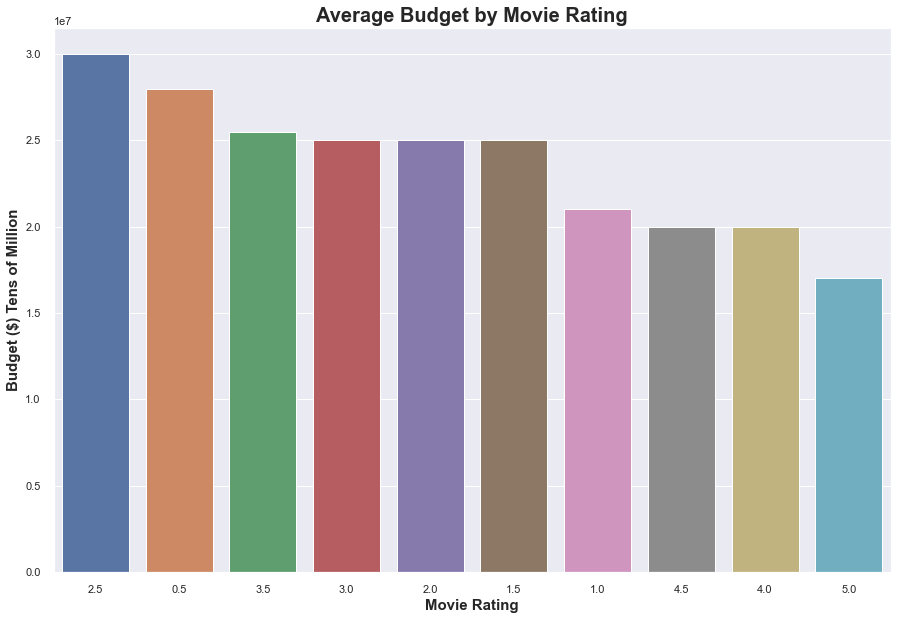

In [125]:
x = tmdb.groupby('rating')['budget'].median().sort_values(ascending = False).keys()
y = tmdb.groupby('rating')['budget'].median().sort_values(ascending = False).values
sns.set_style('darkgrid')
fig,ax=plt.subplots(figsize=(15,10))
color = 'tab:blue'
sns.barplot(x, y, order = tmdb.groupby('rating')['budget'].median().sort_values(ascending = False).keys())
ax.set_xlabel('Movie Rating',fontweight='bold', fontsize=(15))
ax.set_ylabel('Budget ($) Tens of Million', fontweight='bold', fontsize=(15))
ax.set_title('Average Budget by Movie Rating', fontweight='bold', fontsize=(20));
# plt.savefig('Average_Budget_by_Movie_Rating.png')

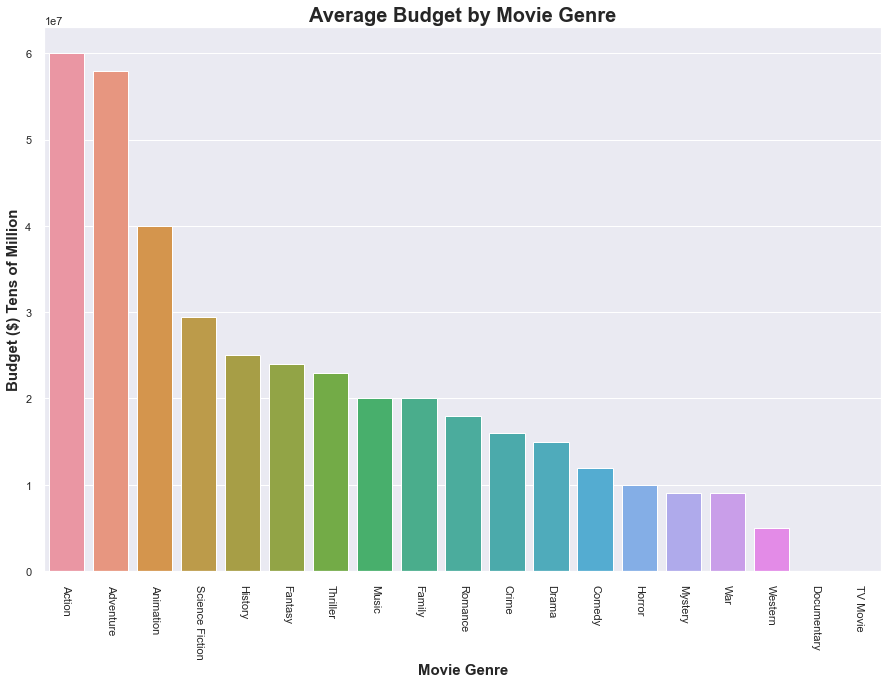

In [126]:
x = tmdb.groupby('main_genre')['budget'].median().sort_values(ascending = False).keys()
y = tmdb.groupby('main_genre')['budget'].median().sort_values(ascending = False).values
sns.set_style('darkgrid')
fig,ax=plt.subplots(figsize=(15,10))
color = 'tab:blue'
sns.barplot(x, y, order = tmdb.groupby('main_genre')['budget'].median().sort_values(ascending = False).keys())
ax.set_xlabel('Movie Genre',fontweight='bold', fontsize=(15))
ax.set_ylabel('Budget ($) Tens of Million', fontweight='bold', fontsize=(15))
plt.xticks(rotation=-90)
ax.set_title('Average Budget by Movie Genre', fontweight='bold', fontsize=(20));
# plt.savefig('Average_Budget_by_Movie_Genre.png')

### CHI-SQUARED TEST (Movie Genre & Movie Rating)

Is there a relationship between the movie genre and the rating it receives?

H0: There is no relationship between the movie genre and rating it receives

HA: There is a relationship between the movie genre and rating it receives

In [64]:
chi_sq = tmdb.groupby('rating')['main_genre'].value_counts()
chi_sq2 = chi_sq.unstack()
chi_sq2.fillna(0,inplace = True)
chi_sq2

main_genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
rating,,,,,,,,,,,,,,,,,,,
0.5,262.0,166.0,42.0,343.0,48.0,5.0,162.0,20.0,54.0,6.0,100.0,2.0,19.0,29.0,59.0,0.0,38.0,1.0,2.0
1.0,509.0,298.0,53.0,777.0,123.0,12.0,348.0,25.0,122.0,4.0,186.0,22.0,36.0,65.0,113.0,1.0,98.0,6.0,9.0
1.5,351.0,205.0,48.0,540.0,44.0,1.0,206.0,15.0,74.0,6.0,104.0,9.0,23.0,29.0,62.0,2.0,60.0,4.0,5.0
2.0,1459.0,868.0,174.0,2045.0,315.0,23.0,920.0,69.0,311.0,23.0,446.0,47.0,76.0,157.0,287.0,1.0,274.0,13.0,29.0
2.5,1007.0,676.0,191.0,1492.0,213.0,36.0,822.0,60.0,239.0,14.0,215.0,29.0,56.0,117.0,164.0,4.0,180.0,11.0,15.0
3.0,3614.0,2336.0,636.0,4780.0,1084.0,136.0,3157.0,211.0,884.0,88.0,759.0,133.0,186.0,515.0,676.0,6.0,650.0,38.0,120.0
3.5,2177.0,1742.0,533.0,2812.0,604.0,186.0,2474.0,117.0,482.0,46.0,457.0,64.0,146.0,267.0,438.0,8.0,448.0,25.0,71.0
4.0,3918.0,3258.0,1056.0,5441.0,1730.0,344.0,5730.0,241.0,942.0,140.0,849.0,153.0,331.0,558.0,897.0,9.0,850.0,82.0,213.0
4.5,1199.0,1088.0,375.0,1501.0,540.0,126.0,2123.0,61.0,277.0,35.0,241.0,41.0,145.0,117.0,265.0,1.0,285.0,24.0,74.0


In [65]:
# contingency table
stat, p, dof, expected = chi2_contingency(chi_sq2)
print(expected)
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

[[2.18742969e+02 1.67568783e+02 4.91077694e+01 2.99319688e+02
  7.59711779e+01 1.32763854e+01 2.58112921e+02 1.26956280e+01
  5.11471735e+01 5.57797271e+00 5.06204400e+01 7.87399053e+00
  1.64367864e+01 2.79708995e+01 4.62715121e+01 4.45697577e-01
  4.45427458e+01 3.06585909e+00 9.25160123e+00]
 [4.52143971e+02 3.46366402e+02 1.01506266e+02 6.18696881e+02
  1.57033208e+02 2.74424255e+01 5.33522069e+02 2.62419939e+01
  1.05721735e+02 1.15297271e+01 1.04632971e+02 1.62756196e+01
  3.39750070e+01 5.78161376e+01 9.56436926e+01 9.21261487e-01
  9.20703147e+01 6.33716235e+00 1.91231551e+01]
 [2.88006206e+02 2.20628118e+02 6.46573577e+01 3.94096909e+02
  1.00026853e+02 1.74802482e+01 3.39842344e+02 1.67155985e+01
  6.73425230e+01 7.34419382e+00 6.66490035e+01 1.03672276e+01
  2.16413653e+01 3.68276644e+01 6.09230218e+01 5.86824203e-01
  5.86468552e+01 4.03663922e+00 1.21810479e+01]
 [1.21403958e+03 9.30019085e+02 2.72551736e+02 1.66124631e+03
  4.21645632e+02 7.36849167e+01 1.43254572e+03 7.0

Based on the P-Value, we can reject the null hypothesis; concluding that the test was significant.

In [67]:
genre_rating = pd.DataFrame(tmdb.groupby('main_genre')['rating'].mean().sort_values(ascending = False)).transpose()
genre_rating

main_genre,Western,Documentary,Drama,Crime,Animation,Mystery,History,War,Adventure,Music,Thriller,Science Fiction,Family,Romance,Fantasy,Action,Comedy,TV Movie,Horror
rating,3.856204,3.788403,3.719402,3.682044,3.656903,3.625719,3.618644,3.605727,3.546184,3.494854,3.481049,3.469352,3.437766,3.40536,3.391339,3.373117,3.358632,3.257576,3.237327


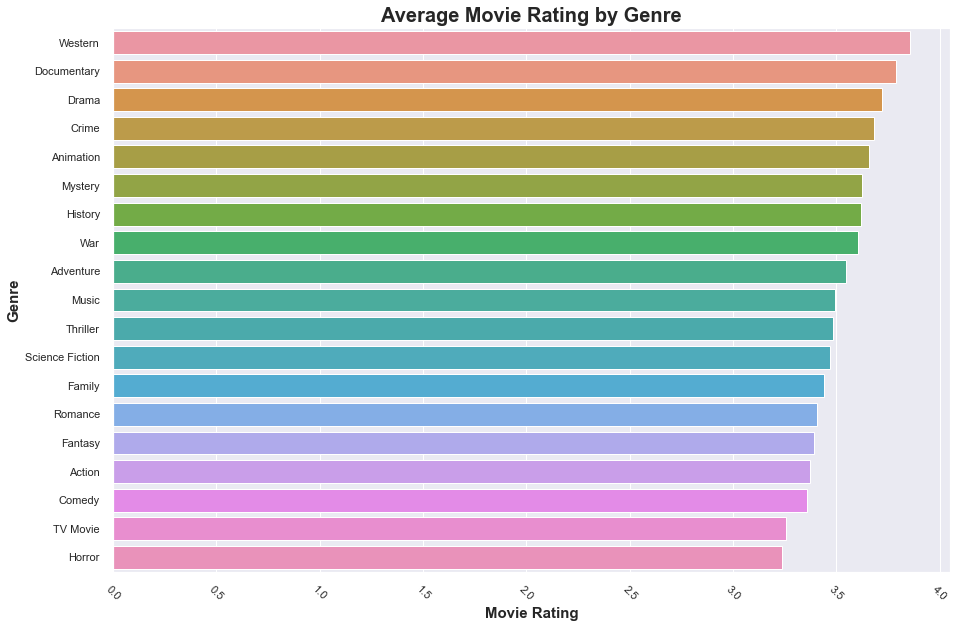

In [127]:
sns.set(style='darkgrid')
fig,ax=plt.subplots(figsize=(15,10))
ax =sns.barplot(data=genre_rating,orient='h')
ax.set_xlabel('Movie Rating',fontweight='bold', fontsize=(15))
plt.xticks(rotation=-45)
ax.set_ylabel('Genre',fontweight='bold', fontsize=(15))
ax.set_title('Average Movie Rating by Genre', fontweight='bold', fontsize=(20));
# plt.savefig('Average_Movie_Rating_by_Genre.png')

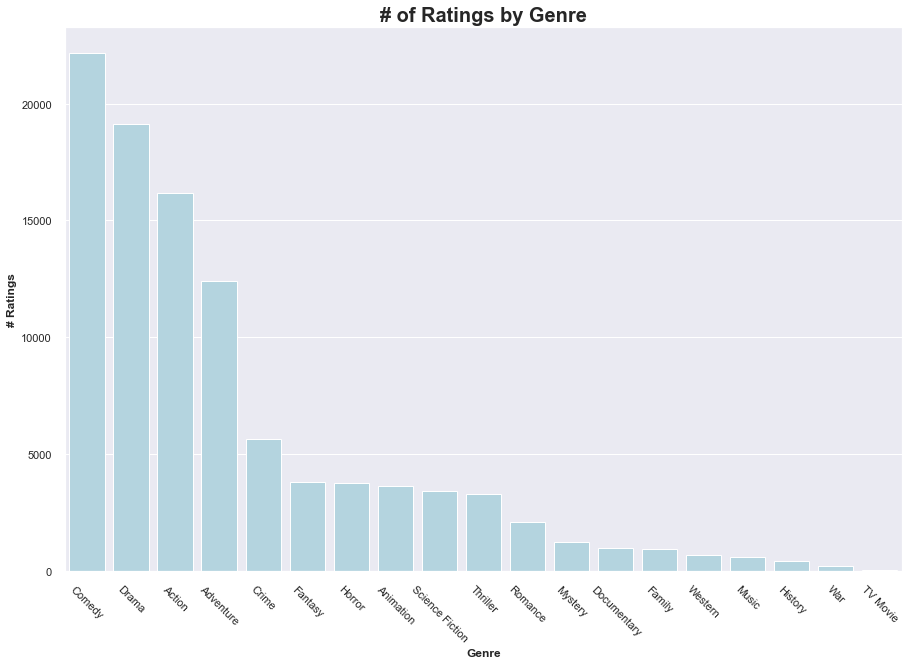

<Figure size 576x396 with 0 Axes>

In [128]:
min_order = tmdb.groupby('main_genre')['rating'].count().sort_values(ascending = False).index
sns.set_style('darkgrid')
plt.figure(figsize = (15,10))
sns.countplot(tmdb['main_genre'], palette = ['lightblue'],order = min_order)
plt.title('# of Ratings by Genre', fontsize = 20,fontweight='bold')
plt.ylabel('# Ratings', fontsize = 12,fontweight='bold')
plt.xlabel('Genre', fontsize = 12,fontweight='bold')
plt.xticks(rotation=-45)
plt.show()
# plt.savefig('Number_of_Ratings_by_Genre.png')

### Chi-Squared Test (Movie Run Time & Movie Rating)

H0: There is no relationship between the movie runtime and the rating it receives

HA: There is a relationship between the movie runtime and the rating it receives

In [70]:
tmdb['runtime2'].value_counts(ascending=False)

60-119     66051
120-179    32285
180+        1670
0-59         533
Name: runtime2, dtype: int64

In [71]:
chi_sq3 = tmdb.groupby('rating')['runtime2'].value_counts()
chi_sq4 = chi_sq3.unstack()
chi_sq4.fillna(0,inplace = True)
chi_sq4

runtime2,0-59,120-179,180+,60-119
rating,,,,
0.5,8,304,18,1028
1.0,12,589,24,2182
1.5,9,344,14,1421
2.0,13,1739,66,5719
2.5,24,1373,44,4099
3.0,61,5792,229,13926
3.5,60,4249,159,8628
4.0,148,9285,517,16789
4.5,75,3283,191,4968


In [72]:
# contingency table
stat, p, dof, expected = chi2_contingency(chi_sq4)
print(expected)
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

[[7.19933558e+00 4.36079830e+02 2.25570177e+01 8.92163817e+02]
 [1.48811009e+01 9.01381504e+02 4.66255881e+01 1.84411181e+03]
 [9.47894847e+00 5.74161072e+02 2.96995196e+01 1.17466046e+03]
 [3.99568426e+01 2.42027517e+03 1.25193109e+02 4.95157488e+03]
 [2.93698963e+01 1.77900019e+03 9.20220014e+01 3.63960791e+03]
 [1.06070918e+02 6.42495231e+03 3.32342275e+02 1.31446345e+04]
 [6.94274660e+01 4.20537662e+03 2.17530709e+02 8.60366520e+03]
 [1.41754812e+02 8.58640542e+03 4.44147346e+02 1.75666924e+04]
 [4.51522394e+01 2.73497195e+03 1.41471369e+02 5.59540444e+03]
 [6.97084415e+01 4.22239594e+03 2.18411064e+02 8.63848456e+03]]
probability=0.950, critical=40.113, stat=2132.050)
Dependent (reject H0)
signigicance=0.050, p=0.000,
Dependent (reject H0)


Based on the P-Value, we can reject the null hypothesis; concluding that the test was significant.

In [73]:
tmdb.groupby('runtime2')['rating'].mean()  #grabbed the mean rating based on runtime category

runtime2
0-59       3.851782
60-119     3.398223
120-179    3.684792
180+       3.896407
Name: rating, dtype: float64

In [74]:
tmdb.groupby('runtime2')['rating'].count()  #count of each runtime category over the rating dataset

runtime2
0-59         533
60-119     66051
120-179    32285
180+        1670
Name: rating, dtype: int64

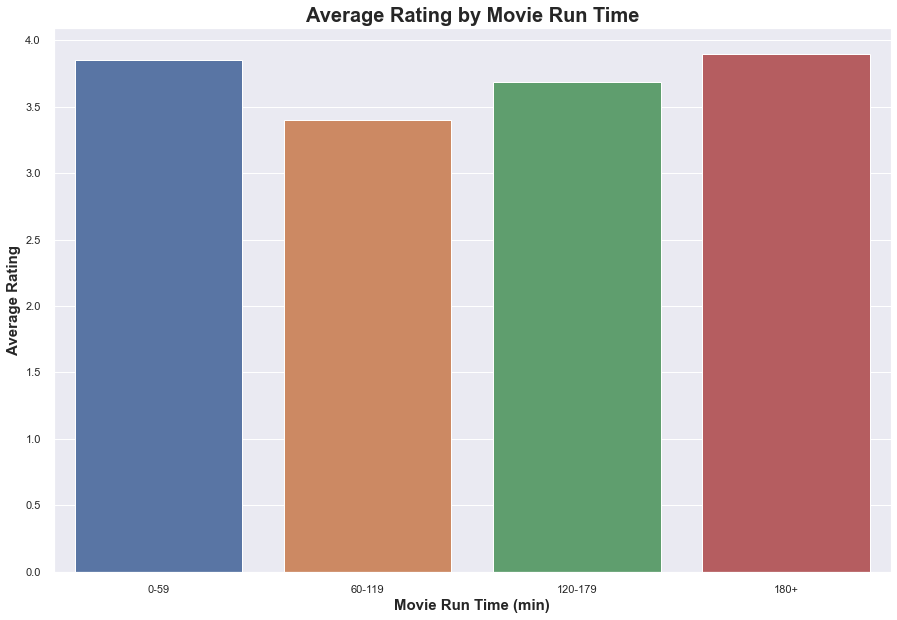

In [129]:
x = tmdb.groupby('runtime2')['rating'].mean().sort_values(ascending = False).keys()
y = tmdb.groupby('runtime2')['rating'].mean().sort_values(ascending = False).values
sns.set_style('darkgrid')
fig,ax=plt.subplots(figsize=(15,10))
color = 'tab:blue'
sns.barplot(x, y)
ax.set_xlabel('Movie Run Time (min)',fontweight='bold', fontsize=(15))
ax.set_ylabel('Average Rating', fontweight='bold', fontsize=(15))
ax.set_title('Average Rating by Movie Run Time', fontweight='bold', fontsize=(20));
# plt.savefig('Average_Rating_by_Movie_RunTime.png')

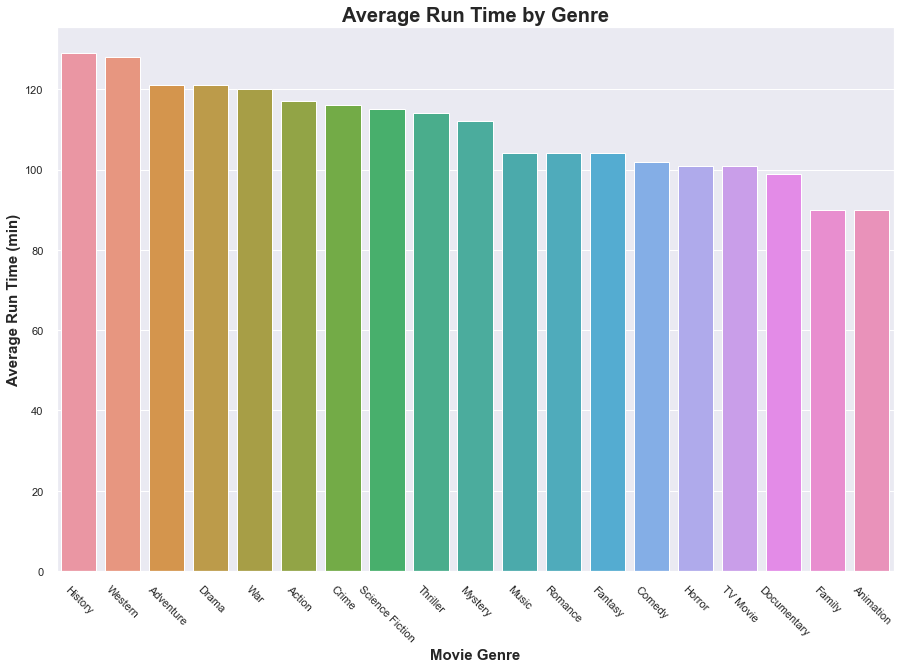

In [130]:
x = tmdb.groupby('main_genre')['runtime'].median().sort_values(ascending = False).keys()
y = tmdb.groupby('main_genre')['runtime'].median().sort_values(ascending = False).values
sns.set_style('darkgrid')
fig,ax=plt.subplots(figsize=(15,10))
color = 'tab:blue'
sns.barplot(x, y, order = tmdb.groupby('main_genre')['runtime'].median().sort_values(ascending = False).keys())
ax.set_xlabel('Movie Genre',fontweight='bold', fontsize=(15))
plt.xticks(rotation=-45)
ax.set_ylabel('Average Run Time (min)', fontweight='bold', fontsize=(15))
ax.set_title('Average Run Time by Genre', fontweight='bold', fontsize=(20));
# plt.savefig('Average_RunTime_by_Genre.png')

# Modeling

In [15]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate

In [16]:
reader = Reader(rating_scale=(0, 5))  #set scale for ratings from 0-5
data = Dataset.load_from_df(fdf[['userId', 'movieId', 'rating']], reader)  #converts into object that Suprise can use

In [17]:
dataset = data.build_full_trainset()  #building a training dataset from here
print('Number of users: ', dataset.n_users, '\n')  #wanted to output number of users and items
print('Number of items: ', dataset.n_items)

Number of users:  610 

Number of items:  9724


### Cross Validating Between Different Classification Models 

In [18]:
from surprise import KNNBasic       
from surprise import SVDpp
from surprise import SlopeOne
from surprise import NMF
from surprise import NormalPredictor
from surprise import KNNBaseline
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import BaselineOnly
from surprise import CoClustering
from surprise.model_selection import cross_validate
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.869667,376.505280,14.799183
BaselineOnly,0.876518,0.233656,0.254668
SVD,0.880425,7.251839,0.421270
KNNBaseline,0.882590,0.319823,2.637378
KNNWithMeans,0.903804,0.112989,2.155080
KNNWithZScore,0.904003,0.164074,2.444102
SlopeOne,0.912790,4.086600,10.454876
NMF,0.935515,4.876914,0.249678
CoClustering,0.957478,2.306744,0.273419


### Baseline Grid Search

In [20]:
bsl_options = {'reg_i': [5,10,15],
         'reg_u': [10,15,20],
         "n_epochs": [5,10,15]}
param_grid = {'bsl_options':bsl_options}
g_s_bso = GridSearchCV(BaselineOnly, param_grid, n_jobs = -1, cv = 5, joblib_verbose = 10)
g_s_bso.fit(data)
print(g_s_bso.best_score)
print(g_s_bso.best_params)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 118 out of 135 | elapsed:  2.8min remaining:   24.4s
[Parallel(n_jobs=-1)]: Done 132 out of 135 | elapsed:  3.1min remaining:    4.3s


{'rmse': 0.8661735678231516, 'mae': 0.6661063181308882}
{'rmse': {'bsl_options': {'reg_i': 5, 'reg_u': 10, 'n_epochs': 15}}, 'mae': {'bsl_options': {'reg_i': 5, 'reg_u': 10, 'n_epochs': 15}}}


[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  3.2min finished


### SVD Grid Search

In [19]:
params = {'n_factors': [20, 50, 100, 130],
         'reg_all': [0.02, 0.05, 0.1],
         "n_epochs": [15, 20, 30]}
g_s_svd = GridSearchCV(SVD, param_grid = params, n_jobs = -1, cv = 5, joblib_verbose = 10)
g_s_svd.fit(data)

print(g_s_svd.best_score)
print(g_s_svd.best_params)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 168 out of 180 | elapsed:  5.6min remaining:   23.8s


{'rmse': 0.8630879776771512, 'mae': 0.6624390964680079}
{'rmse': {'n_factors': 130, 'reg_all': 0.05, 'n_epochs': 30}, 'mae': {'n_factors': 130, 'reg_all': 0.05, 'n_epochs': 30}}


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  6.1min finished


### SVDpp Grid Search

In [30]:
params = {'n_factors': [20,30],
         'reg_all': [0.01, 0.02, 0.1],
         "n_epochs": [20, 30]}
g_s_svd = GridSearchCV(SVDpp, param_grid = params, n_jobs = -1, cv = 5, joblib_verbose = 10)
g_s_svd.fit(data)
print(g_s_svd.best_score)
print(g_s_svd.best_params)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed: 57.0min
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed: 84.6min
[Parallel(n_jobs=-1)]: Done  36 out of  60 | elapsed: 103.9min remaining: 69.3min
[Parallel(n_jobs=-1)]: Done  43 out of  60 | elapsed: 120.0min remaining: 47.4min
[Parallel(n_jobs=-1)]: Done  50 out of  60 | elapsed: 135.0min remaining: 27.0min
[Parallel(n_jobs=-1)]: Done  57 out of  60 | elapsed: 144.8min remaining:  7.6min


{'rmse': 0.8591327875639145, 'mae': 0.6594318992859571}
{'rmse': {'n_factors': 30, 'reg_all': 0.1, 'n_epochs': 30}, 'mae': {'n_factors': 30, 'reg_all': 0.02, 'n_epochs': 20}}


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 147.1min finished


# Building Recommendation System

In [80]:
svdpp = SVDpp(n_factors=30, reg_all=0.1, n_epochs=30, verbose = True)  #wanted to test prediction on single user
svdpp.fit(dataset)

 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
 processing epoch 20
 processing epoch 21
 processing epoch 22
 processing epoch 23
 processing epoch 24
 processing epoch 25
 processing epoch 26
 processing epoch 27
 processing epoch 28
 processing epoch 29


In [81]:
svdpp.predict(2, 4)

Prediction(uid=2, iid=4, r_ui=None, est=2.8352229983731925, details={'was_impossible': False})

In [107]:
import csv  #imported to have CSV file in a folder 
tmdb.to_csv('tmdb_edits.csv')

In [108]:
mov_df = pd.read_csv("tmdb_edits.csv",index_col=0)  #reading in the csv file into a Pandas Data Frame

In [109]:
mov_df.drop(columns=['userId','rating','imdb_id','budget','genres','popularity', 'release_date',
                  'revenue','runtime','runtime2'], inplace = True)
mov_df.head()

,movieId,title_x,main_genre
0,1,Toy Story (1995),Animation
1,1,Toy Story (1995),Animation
2,1,Toy Story (1995),Animation
3,1,Toy Story (1995),Animation
4,1,Toy Story (1995),Animation


In [86]:
reader = Reader(rating_scale=(0, 5))  #set scale for ratings from 0-5
data = Dataset.load_from_df(fdf[['userId', 'movieId', 'rating']], reader)  #converts into object that Suprise can use

### Recommendation System for Top Movies

In [110]:
def recommendations(user_id, model, num): # input user_id, model type, # of movie recommendations
    movie_rating = []
    for movie_id in fdf['movieId'].unique(): # make predictions for the user
        movie_rating.append((movie_id,model.predict(user_id,movie_id)[3])) # add predicitions for all 9742 movies
    movie_preds = pd.DataFrame(movie_rating) # change the data into a data frame
    movie_preds.columns = ['movieId','rating'] # rename columns
    movie_preds = movie_preds.sort_values(by='rating',ascending=False) # sort predictions by highest rated movie
    idf = pd.read_csv("movies.csv")
    idf.drop(columns=['genres'], inplace = True)
    movie_rec = movie_preds.merge(idf, on = 'movieId', how ='inner') # merged data frames in order to reccommend movie titles 
    return movie_rec[0:num]

In [111]:
recommendations(100, svdpp, 5)

,movieId,rating,title
0,3451,4.762201,Guess Who's Coming to Dinner (1967)
1,951,4.722608,His Girl Friday (1940)
2,177593,4.701940,"Three Billboards Outside Ebbing, Missouri (2017)"
3,2360,4.682353,"Celebration, The (Festen) (1998)"
4,1217,4.666047,Ran (1985)


### Recommendation System for Top Movies by Genre

In [118]:
def recommendations_genre(user_id, model, num, genre): # input user_id, model type, # of movie recommendations, choose genre
    movie_rating = []
    for movie_id in fdf['movieId'].unique(): # make predictions for the user
        movie_rating.append((movie_id,model.predict(user_id,movie_id)[3])) # add predicitions for all 9742 movies
    movie_preds = pd.DataFrame(movie_rating) # change the data into a data frame
    movie_preds.columns = ['movieId','rating'] # rename columns
    movie_preds = movie_preds.sort_values(by='rating',ascending=False) # sort predictions by highest rated movie
    movie_rec = movie_preds.merge(mov_df, on = 'movieId', how ='inner') # merged data frames in order to reccommend movie titles 
    movie_rec = movie_rec.drop_duplicates(subset='movieId',keep='first')
    genre_rec = movie_rec[movie_rec['main_genre'] == genre]
    return genre_rec[0:num]

In [119]:
recommendations_genre (100, svdpp, 5, 'Drama')

,movieId,rating,title_x,main_genre
33,2360,4.682353,"Celebration, The (Festen) (1998)",Drama
90,1104,4.624234,"Streetcar Named Desire, A (1951)",Drama
110,1178,4.617480,Paths of Glory (1957),Drama
140,27156,4.586648,Neon Genesis Evangelion: The End of Evangelion...,Drama
145,1041,4.584483,Secrets & Lies (1996),Drama


### Recommendation System for Top Movies by Genre & Run TIme

In [120]:
def recommendations_runtime(user_id, model, num, genre, length): # input user_id, model type, # of movie recommendations, choose genre
    movie_rating = []
    for movie_id in fdf['movieId'].unique(): # make predictions for the user
        movie_rating.append((movie_id,model.predict(user_id,movie_id)[3])) # add predicitions for all 9742 movies
    movie_preds = pd.DataFrame(movie_rating) # change the data into a data frame
    movie_preds.columns = ['movieId','rating'] # rename columns
    movie_preds = movie_preds.sort_values(by='rating',ascending=False) # sort predictions by highest rated movie
    mov_df1 = pd.read_csv("tmdb_edits.csv",index_col=0)  #reading in the csv file into a Pandas Data Frame
    mov_df1.drop(columns=['userId','rating','imdb_id','budget','genres','popularity', 'release_date',
                  'revenue','runtime'], inplace = True)
    movie_rec = movie_preds.merge(mov_df1, on = 'movieId', how ='inner') # merged data frames in order to reccommend movie titles 
    movie_rec = movie_rec.drop_duplicates(subset='movieId',keep='first')
    genre_rec = movie_rec[movie_rec['main_genre'] == genre]
    length_rec = genre_rec[genre_rec['runtime2'] == length]
    return length_rec[0:num]

In [121]:
# Run Time choices are '0-59','60-119','120-179','180+'
recommendations_runtime(100, svdpp, 5, 'Drama', '60-119')

,movieId,rating,title_x,main_genre,runtime2
33,2360,4.682353,"Celebration, The (Festen) (1998)",Drama,60-119
110,1178,4.617480,Paths of Glory (1957),Drama,60-119
140,27156,4.586648,Neon Genesis Evangelion: The End of Evangelion...,Drama,60-119
184,2732,4.572585,Jules and Jim (Jules et Jim) (1961),Drama,60-119
189,922,4.571776,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama,60-119


### Recommendation System for Top Movies by Genre, Run Time, Year

In [132]:
def recommendations_year(user_id, model, num, genre, length, year): # input user_id, model type, # of movie recommendations, choose genre
    movie_rating = []
    for movie_id in fdf['movieId'].unique(): # make predictions for the user
        movie_rating.append((movie_id,model.predict(user_id,movie_id)[3])) # add predicitions for all 9742 movies
    movie_preds = pd.DataFrame(movie_rating) # change the data into a data frame
    movie_preds.columns = ['movieId','rating'] # rename columns
    movie_preds = movie_preds.sort_values(by='rating',ascending=False) # sort predictions by highest rated movie
    mov_df2 = pd.read_csv("tmdb_edits.csv",index_col=0)  #reading in the csv file into a Pandas Data Frame
    mov_df2.drop(columns=['userId','rating','imdb_id','budget','genres','popularity',
                  'revenue','runtime'], inplace = True)
    movie_rec = movie_preds.merge(mov_df2, on = 'movieId', how ='inner') # merged data frames in order to reccommend movie titles 
    movie_rec = movie_rec.drop_duplicates(subset='movieId',keep='first')
    genre_rec = movie_rec[movie_rec['main_genre'] == genre]
    length_rec = genre_rec[genre_rec['runtime2'] == length]
    year_rec = length_rec[(length_rec['release_date'] >= year-5) & (length_rec['release_date'] <= year+5)]
    return year_rec[0:num]

In [134]:
# Run Time choices are '0-59','60-119','120-179','180+'
recommendations_year(100, svdpp, 5, 'Drama', '60-119', 2000)

,movieId,rating,title_x,release_date,main_genre,runtime2
33,2360,4.682353,"Celebration, The (Festen) (1998)",1998,Drama,60-119
140,27156,4.586648,Neon Genesis Evangelion: The End of Evangelion...,1997,Drama,60-119
294,1719,4.544722,"Sweet Hereafter, The (1997)",1997,Drama,60-119
743,4967,4.510664,No Man's Land (2001),2001,Drama,60-119
944,8014,4.490350,"Spring, Summer, Fall, Winter... and Spring (Bo...",2003,Drama,60-119


### Steven Spielberg Recommendation

Steven Spielberg wants to create a Comedy movie, but because almost all of his movies in the past have revolved around
Action and Adventure genres we believe our recommendations can guide him in the right direction.

In [135]:
# We wanted to find which user would be the best case for this recommendation system by finding the user who had
# the most comedy movie reviews
tmdb[tmdb['main_genre']=='Comedy']['userId'].value_counts()

414    689
599    588
448    566
474    550
307    348
298    328
111    304
68     301
89     298
274    297
606    280
288    277
600    250
387    235
232    234
480    230
19     224
603    222
177    216
249    204
610    199
555    195
608    194
294    193
182    192
217    192
483    168
226    160
489    155
590    152
156    150
318    149
477    146
438    144
597    143
275    142
42     141
380    139
45     128
525    126
356    124
105    122
64     117
509    114
200    111
469    110
484    110
357    108
91     108
57     107
564    107
51     101
219    101
462    100
563     97
132     97
169     96
84      96
104     96
305     94
365     93
381     91
517     90
514     90
560     88
561     88
280     87
453     86
6       86
66      86
125     84
21      83
140     82
199     81
534     79
587     78
216     77
103     76
73      74
391     74
4       74
221     72
367     72
222     70
202     69
479     68
325     65
18      64
410     64
409     63
282     62

In [136]:
# Steven Spielber's Conditions:
# Relevant User: 414
# Genre: Comedy
# Run Time: 1-2 hours
# Year: 2000's feel
recommendations_year(414, svdpp, 5, 'Comedy', '60-119', 2005)

,movieId,rating,title_x,release_date,main_genre,runtime2
7551,4642,3.898046,Hedwig and the Angry Inch (2000),2001,Comedy,60-119
9683,57669,3.850311,In Bruges (2008),2008,Comedy,60-119
10793,38061,3.839663,Kiss Kiss Bang Bang (2005),2005,Comedy,60-119
13424,56715,3.808589,Wristcutters: A Love Story (2006),2006,Comedy,60-119
13689,44195,3.799798,Thank You for Smoking (2006),2005,Comedy,60-119
